
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   1. Problem Statement

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

An education company named <b>X Education</b> sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at <b>X Education</b> is around 30%. 

Now, although <b>X Education</b> gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg" class="img-thumbnail" alt="Cinque Terre">

It can be seen that there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, potential leads need to be nurtured well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

<b>X Education</b> wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires to build a model wherein lead score will be assigned to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 

<b>The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.</b>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   2. Business Goal

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

<hr>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   3. Setting Up Jupyter Notebook

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [1]:
# Importing and supressing warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Disabling output scroll bar (using Javascript)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Importing required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [5]:
# Configuring display setting

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
sns.set_style('whitegrid')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   4. Reading and Understanding the Data

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [6]:
# Reading the dataset

leads=pd.read_csv("Leads.csv")

In [7]:
# Inspecting the top 5 rows of the dataset

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Inspecting the rows,columns (shape) of the dataset

leads.shape

(9240, 37)

In [9]:
# Getting the information about NaN Values and Data Types of all the features in the dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Inspecting the statistical summary of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Summary:
- The dataset has 37 features and 9240 data points.
- There are 4 features of `float64` type, 3 features of `int64` and 30 features of `object` type in the data set.
- There are missing/null values in the dataset.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   5. Data Cleaning

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### <b>a. Missing Value Treatment</b>

In [11]:
# It can be observed that some features have values as 'Select' 
# It seems that for people who did not select any option from the list, the value was autofilled as 'Select'
# These values can be treated as NULL.

# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [12]:
# Determining the percentage of Missing Values in the dataframe

nulls=(leads.isnull().sum()/len(leads)*100).sort_values(ascending = False)
nulls

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [13]:
# Dropping features having percentage of null values greater than or equal to 45%

leads.drop(columns=nulls[nulls.values>=45].index,inplace=True)

In [14]:
(leads.isnull().sum()/len(leads)*100).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

In [15]:
# Analyzing "City" for possible dropping/imputation of NaN values

leads["City"].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
# The number of NaN values is highest & there is no possible way to find out the city, hence we'll impute it with "Unknown"

leads["City"].replace(np.nan,"Unknown",inplace=True)

In [17]:
# Analyzing "Specialization" for possible dropping/imputation of NaN values

leads["Specialization"].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
# Possibly due to lack of appropriate option in the list, a visitor did not select specialization.
# We will be imputing NaN values with "Others"

leads["Specialization"].replace(np.nan,"Others",inplace=True)

In [19]:
# Analyzing "Tags" for possible dropping/imputation of NaN values

leads["Tags"].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [20]:
# The number of NaN values is highest & there is no possible way to find out the Tags, hence we'll impute it with "Untagged"

leads["Tags"].replace(np.nan,"Untagged",inplace=True)

In [21]:
# Analyzing "What matters most to you in choosing a course" for possible dropping/imputation of NaN values

leads["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
# Most of the entries in the feature "What matters most to you in choosing a course" belong to one category,
# Adding to a list of unwanted_cols as this feature won't add any value on analysis

unwanted_cols=["What matters most to you in choosing a course"]

In [23]:
# Analyzing "What is your current occupation" for possible dropping/imputation of NaN values

leads["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# The number of NaN values in "What is your current occupation" is high & there is no possible way to find out the apt value 
# Hence, we'll impute it with "Unspecified"

leads["What is your current occupation"].replace(np.nan,"Unspecified",inplace=True)

In [25]:
leads["Country"].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [26]:
# Most of the entries in the feature "Country" belong to one category,
# Adding to the list of unwanted_cols as this feature won't add any value on analysis

unwanted_cols.append("Country")

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

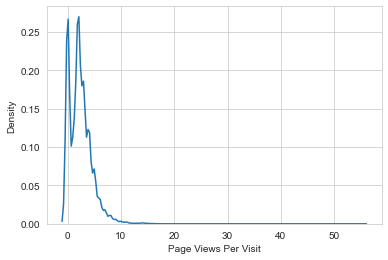

In [27]:
# Analyzing "Page Views Per Visit" for possible dropping/imputation of NaN values through KDE plot

sns.kdeplot(leads["Page Views Per Visit"])

In [28]:
# The data is right skewed hence imputing the NaN values with Median

leads["Page Views Per Visit"].replace(np.nan,leads["Page Views Per Visit"].median(),inplace=True)

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

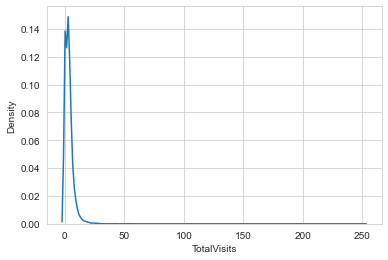

In [29]:
# Analyzing "Total Visits" for possible dropping/imputation of NaN values through KDE plot

sns.kdeplot(leads["TotalVisits"])

In [30]:
# The data is right skewed hence imputing the NaN values with Median

leads["TotalVisits"].replace(np.nan,leads["TotalVisits"].median(),inplace=True)

In [31]:
# Analyzing "Last Activity" for possible dropping/imputation of NaN values

leads["Last Activity"].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [32]:
# Imputing the NaN values of categorical feature "Last Activity" with Mode

leads["Last Activity"].replace(np.nan,leads["Last Activity"].mode()[0],inplace=True)

In [33]:
# Analyzing "Lead Source" for possible dropping/imputation of NaN values

leads["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [34]:
# Imputing the NaN values of categorical feature "Lead Source" with Mode

leads["Lead Source"].replace(np.nan,leads["Lead Source"].mode()[0],inplace=True)

In [35]:
# Verifying the percentage of NaN values after dropping/imputing

(leads.isnull().sum()/len(leads)*100).sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Country                                          26.634199
Prospect ID                                       0.000000
Magazine                                          0.000000
A free copy of Mastering The Interview            0.000000
I agree to pay the amount through cheque          0.000000
City                                              0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Tags                                              0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
X Education Forums                                0.000000
Newspaper Article                                 0.000000
Search                                            0.0000

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Summary:
- Replaced the values `Select` with `NaN`.
- Created a new category for the missing values values of the features `City`,`Specialization`,`Tags` and `What is your current occupation`
- Imputed the missing values of the numeric features `Page Views Per Visit` and `Total Visits` with median as the data was right skewed.
- Imputed the missing values of the categorical feature `Last Activity` and `Lead Source` with the most frequent value(mode).
- Features `What matters most to you in choosing a course` and `Country` had majority of the values from one category, hence added them to the list of unwanted cols.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

### b. Analyzing & Deleting Unnecessary Columns

In [36]:
# Checking number of distinct elements in each feature

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [37]:
# Prospect ID & Lead Number are two features that are just indicative of the ID number of the Contacted People & can be dropped.

leads.drop(columns=["Prospect ID","Lead Number"],inplace=True)

In [38]:
# Dropping features having only 1 unique value as it indicates same value throughout.

leads.drop(columns=leads.loc[:, leads.nunique() == 1].columns,inplace=True)

In [39]:
# Checking the value_counts() of each feature to analyse their significance

for col in leads.columns:
    print(leads[col].value_counts())
    print()
    print("-"*127)
    print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

-------------------------------------------------------------------------------------------------------------------------------

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

---------------------------------------------------------------------------------------------------

In [40]:
# From the output of value_counts(), it can be observed that certain features have imbalanced data
# We'll add those features to the "unwanted_cols" list created earlier and drop them all

unwanted_cols.extend(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
                     'Digital Advertisement','Through Recommendations'])

In [41]:
# Dropping the features with imbalanced data

leads.drop(columns=unwanted_cols,inplace=True)

In [42]:
# Checking the shape of the dataframe after dropping unnecessary features

leads.shape

(9240, 14)

In [43]:
# Getting the information about Values and Data Types of all the features in the dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Summary:
- Dropped `Prospect ID` & `Lead Number` as these features were just indicative of the ID number of the contacted people.
- Dropped the features `Magazine`,`Receive More Updates About Our Courses`,`Update me on Supply Chain Content`,`Get updates on DM Content` and `I agree to pay the amount through cheque` as they had only one unique value and wouldn't have added any value to the analysis.
- Dropped the features `Do Not Call`,`Search`,`Newspaper Article`,`X Education Forums`,`Newspaper`,`Digital Advertisement`,`Through Recommendations` as majority of the values belonged to one class. Also dropped `Country` and `What matters most to you in choosing a course` for the same reason.

    
<b>Note</b>: The shape of the dataset after dropping unwanted features stands as <b>(9240, 14)</b>

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

### c. Fixing Incorrect Data Values and replacing low frequency values

In [44]:
# Fixing capitalization error in "Lead Source"

leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [45]:
# Clubbing all low frequency values of "Lead Source" to "Others"

leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [46]:
# Clubbing all low frequency values of "Last Activity" to "Others"

leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                         'Visited Booth in Tradeshow', 'Approached upfront',
                                                        'Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

In [47]:
# Clubbing all low frequency values of "Tags" to "Others"

leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                       'Diploma holder (Not Eligible)','Approached upfront','Graduation in progress',
                                       'number not provided', 'opp hangup','Still Thinking','Lost to Others',
                                       'Shall take in the next coming month','Lateral student','Interested in Next batch',
                                       'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                       'University not recognized'], 'Others')

In [48]:
# Clubbing all low frequency values of "Last Notable Activity" to "Others"

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Others')

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Summary:
- Corrected the spelling of 'google' in the feature `Lead Source`.
- Clubbed all the low frequency values in the features `Lead Source`,`Last Activity`,`Tags`, `Last Notable Activity` in "Others" class.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

### <b>e. Identifying and Handling Outliers</b>

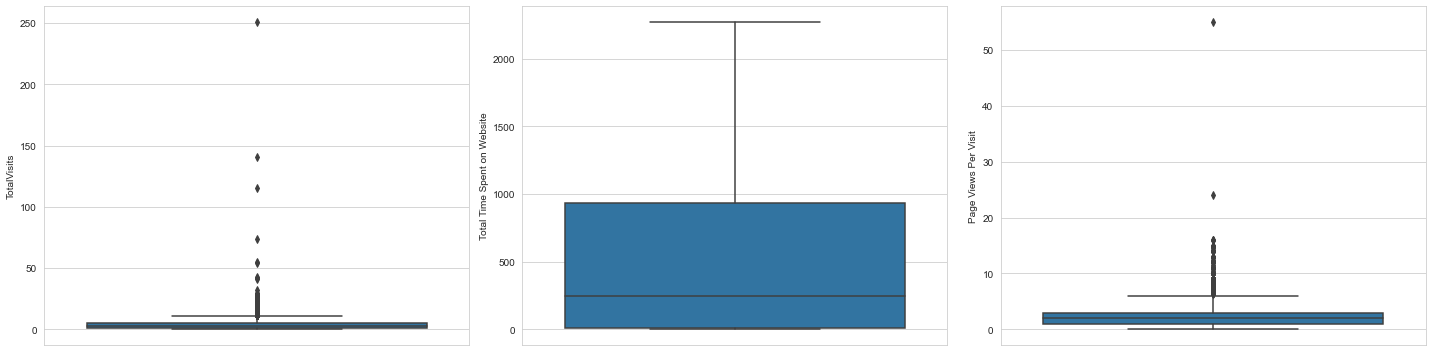

In [49]:
# Plotting boxplot to identify the outliers

plt.figure(figsize=(20,5))

for i in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(y=leads[i[1]])
    plt.tight_layout()

In [50]:
# Capping the outliers present in "TotalVisits" and "Page Views Per Visit" to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

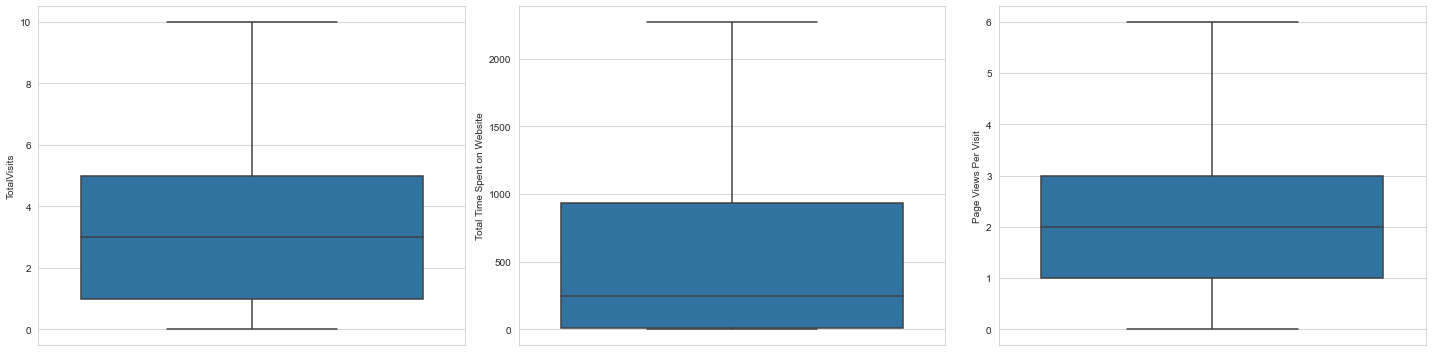

In [51]:
# Verifying if outliers have been treated

plt.figure(figsize=(20,5))

for i in enumerate(['TotalVisits','Total Time Spent on Website','Page Views Per Visit',]):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(y=leads[i[1]])
    plt.tight_layout()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Summary:
- Identified the outliers in the numeric features.
- Capped the outliers present in `TotalVisits` and `Page Views Per Visit` to 95%.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   6. Exploratory Data Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### a. Conversion Rate

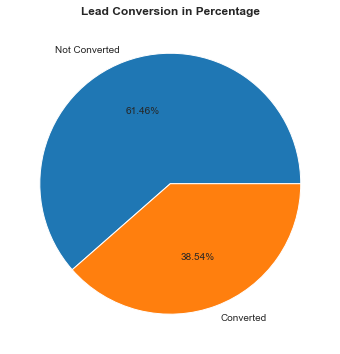

In [52]:
# Plotting pie-chart to check conversion rate

plt.figure(figsize=(6,6))
plt.title("Lead Conversion in Percentage",weight="bold")
leads['Converted'].value_counts(normalize=True).plot.pie(autopct = "%1.2f%%",
            labels=["Not Converted","Converted"])
plt.ylabel("")
plt.show()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Insights:
- The Conversion Rate is 38.54%.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

### b. Univariate Analysis of Categorical Features

In [53]:
# Segregating categorical and numeric variables for analysis

cat_vars=list(leads.select_dtypes(['object']).columns)
num_cols=list(leads.select_dtypes(['int64']).columns)+list((leads.select_dtypes(['float']).columns))
num_vars=num_cols.copy()
num_vars.remove("Converted")

In [54]:
# Defining plotting function for univariate analysis of categorical features

def univariate_categorical(df,feature,horizontal_layout=True):

    # Calculate the percentage of Converted=1 per category value
    percent_value = df[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    percent_value["Converted"] = percent_value["Converted"]*100
    percent_value.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="Converted",
                    order=df[feature].value_counts().index,
                    palette='nipy_spectral')
    for p in s.patches:
        s.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
    # Define common styling
    ax1.set_title(f"Feature : {feature}\n [ Count of Converted and Not-Converted ]\n", fontdict={'fontsize' : 15, 'fontweight' : 12, 'color' : 'Black'}) 
    ax1.set_xlabel("")
    ax1.legend(['Converted','Not-Converted'])
    ax1.set_ylabel("Count",fontdict={'fontsize' : 12, 'fontweight' : 3, 'color' : 'Blue'})
    
    s.set_xticklabels(s.get_xticklabels(),rotation=45)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    data=percent_value,
                    order=percent_value[feature], 
                    palette='Paired')
    
    
    s.set_xticklabels(s.get_xticklabels(),rotation=45)
    
    plt.ylabel('Conversion %', fontdict={'fontsize' : 12, 'fontweight' : 3, 'color' : 'Blue'})
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_xlabel("")
    ax2.set_title(f"Feature : {feature}\n [ Percentage of Conversions ]\n", fontdict={'fontsize' : 15, 'fontweight' : 12,'color' : 'Black'}) 
    ax2.bar_label(ax2.containers[-1], fmt='\n%.2f', label_type='center')
    
    plt.tight_layout()
    plt.show();
    print("*"*125)

In [55]:
cat_vars

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

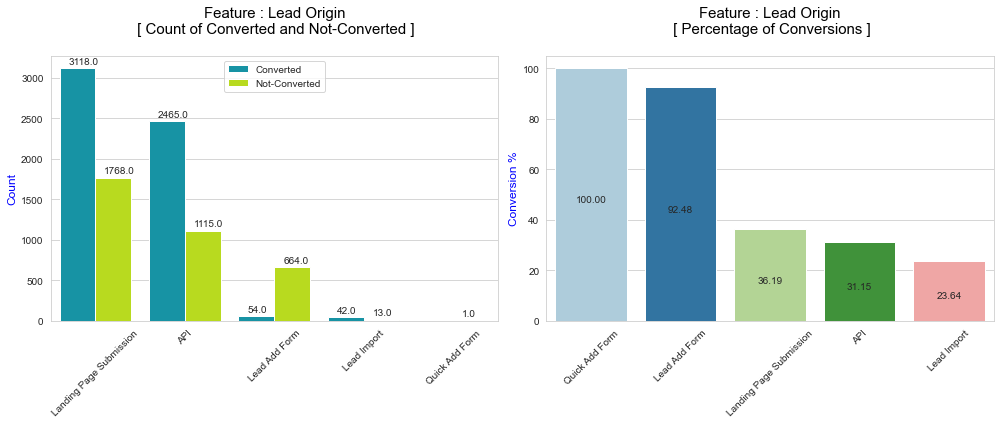

*****************************************************************************************************************************


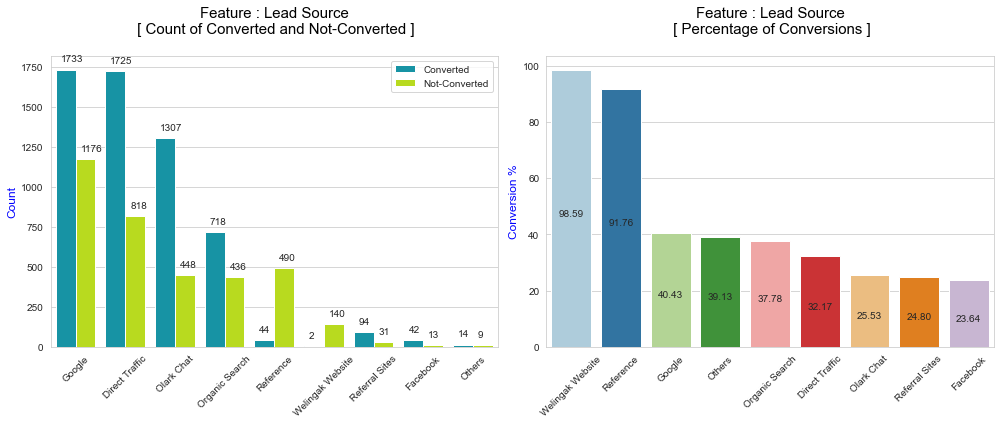

*****************************************************************************************************************************


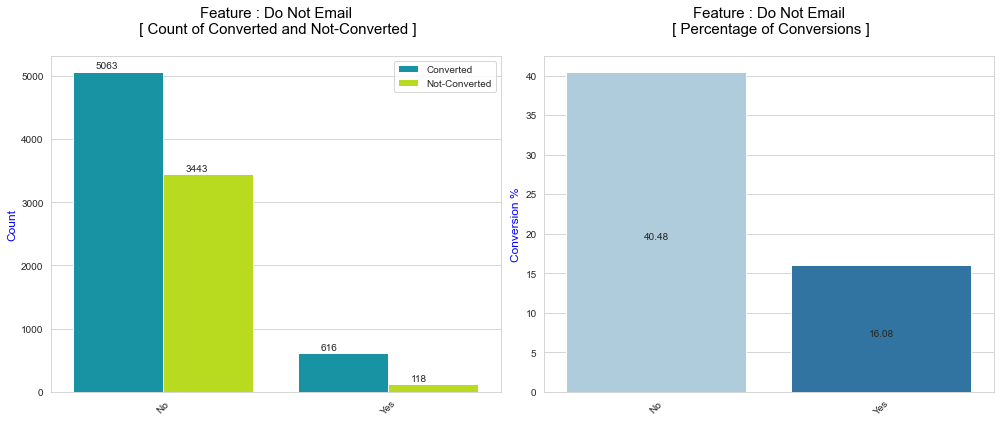

*****************************************************************************************************************************


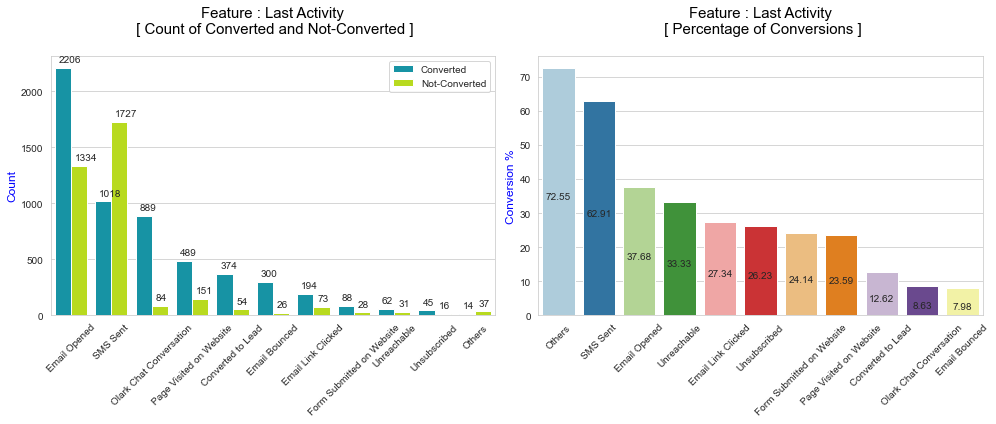

*****************************************************************************************************************************


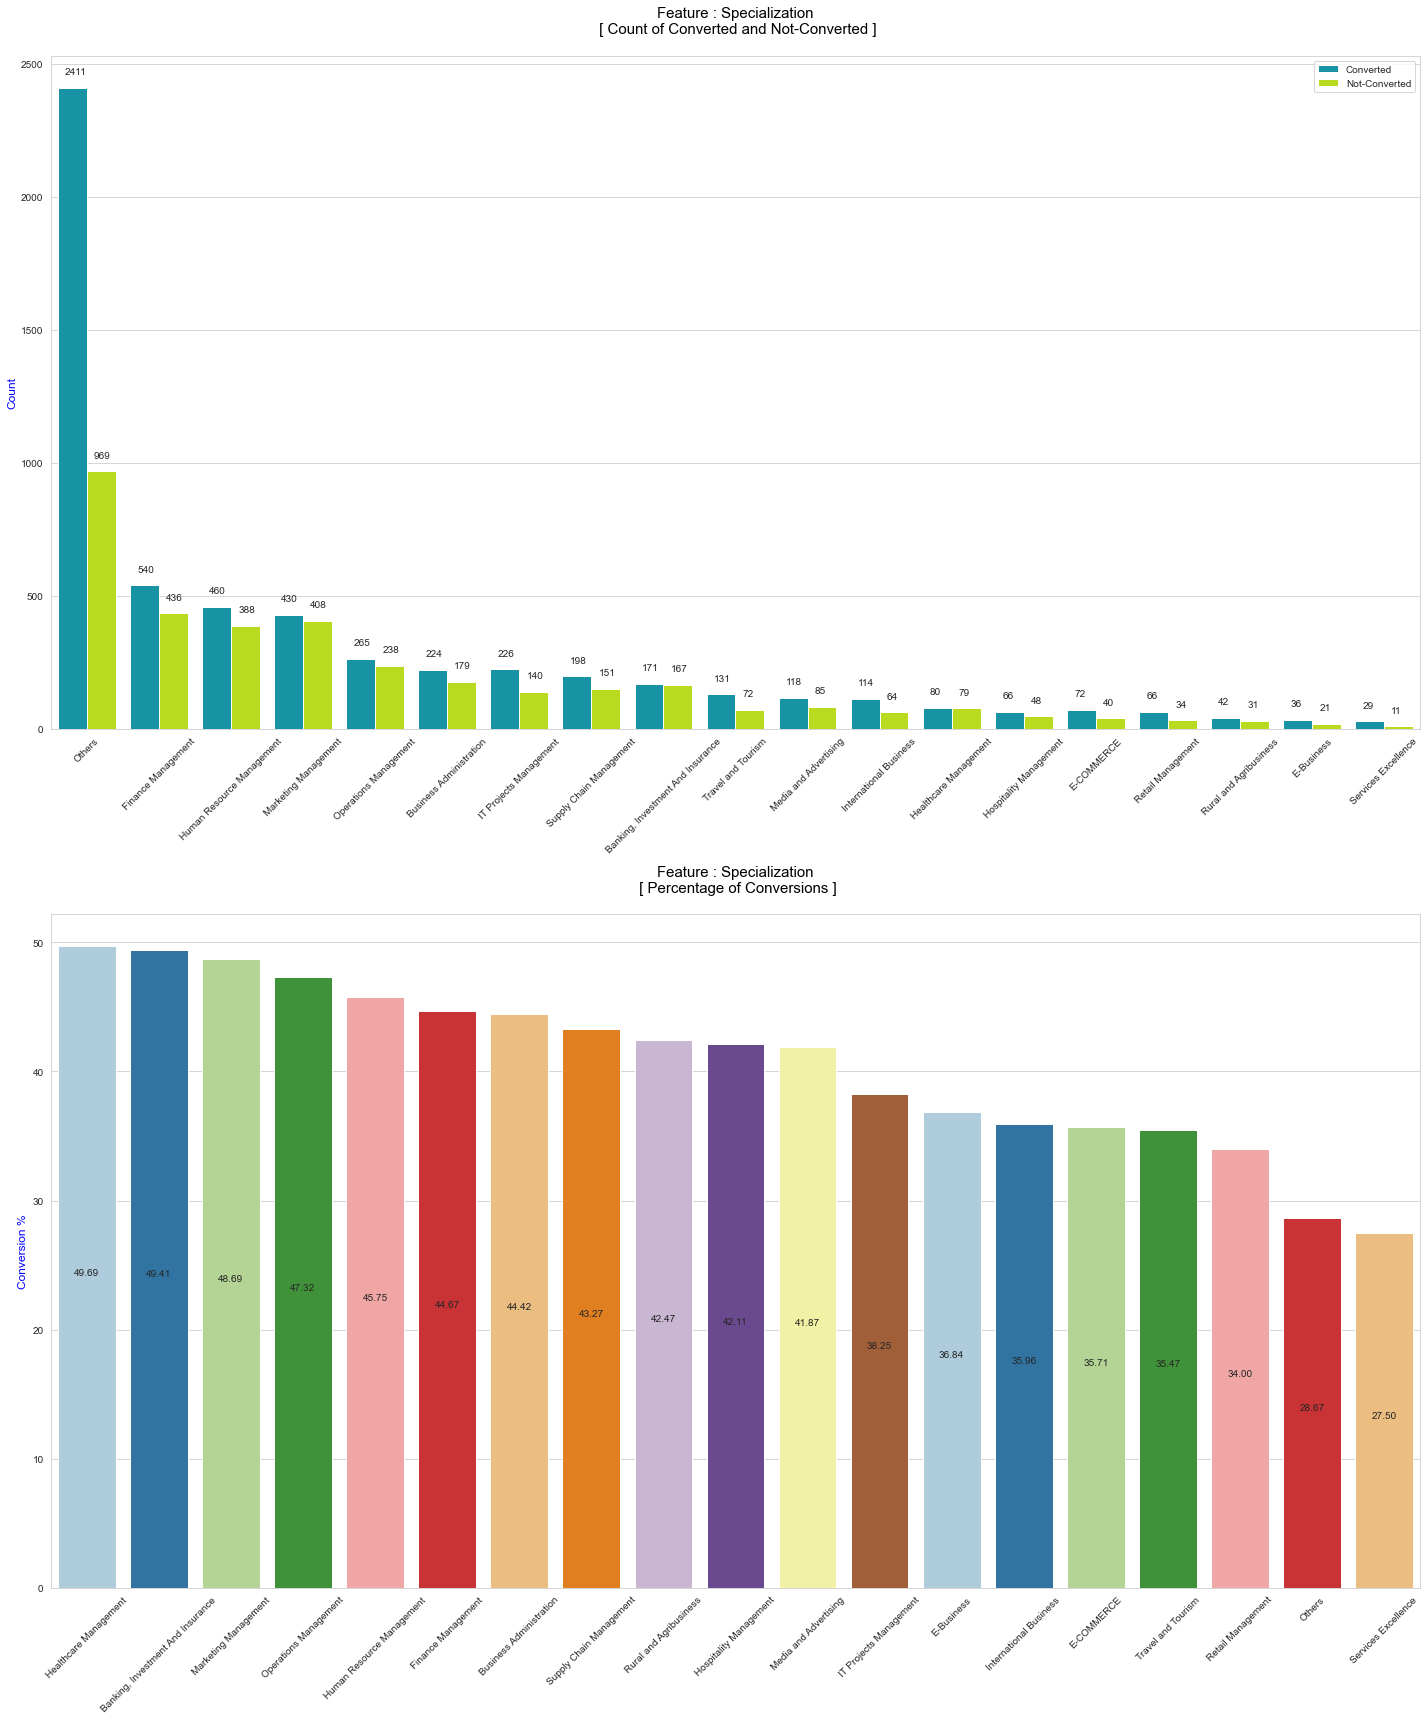

*****************************************************************************************************************************


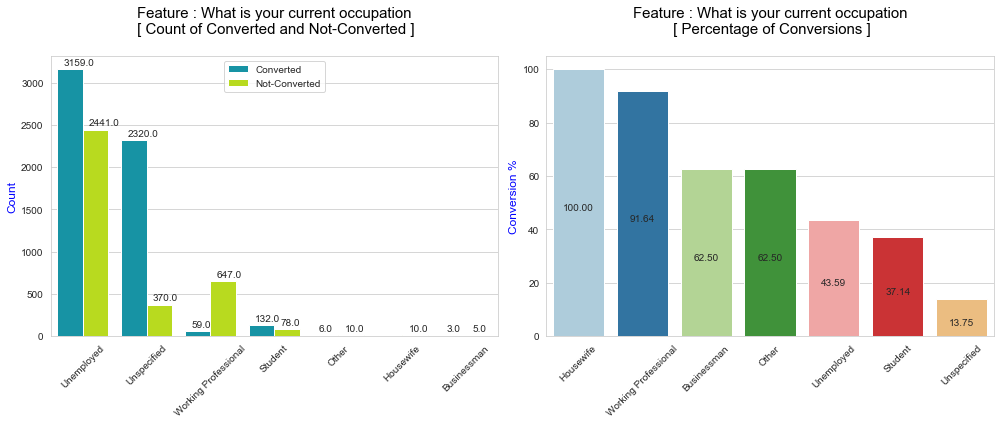

*****************************************************************************************************************************


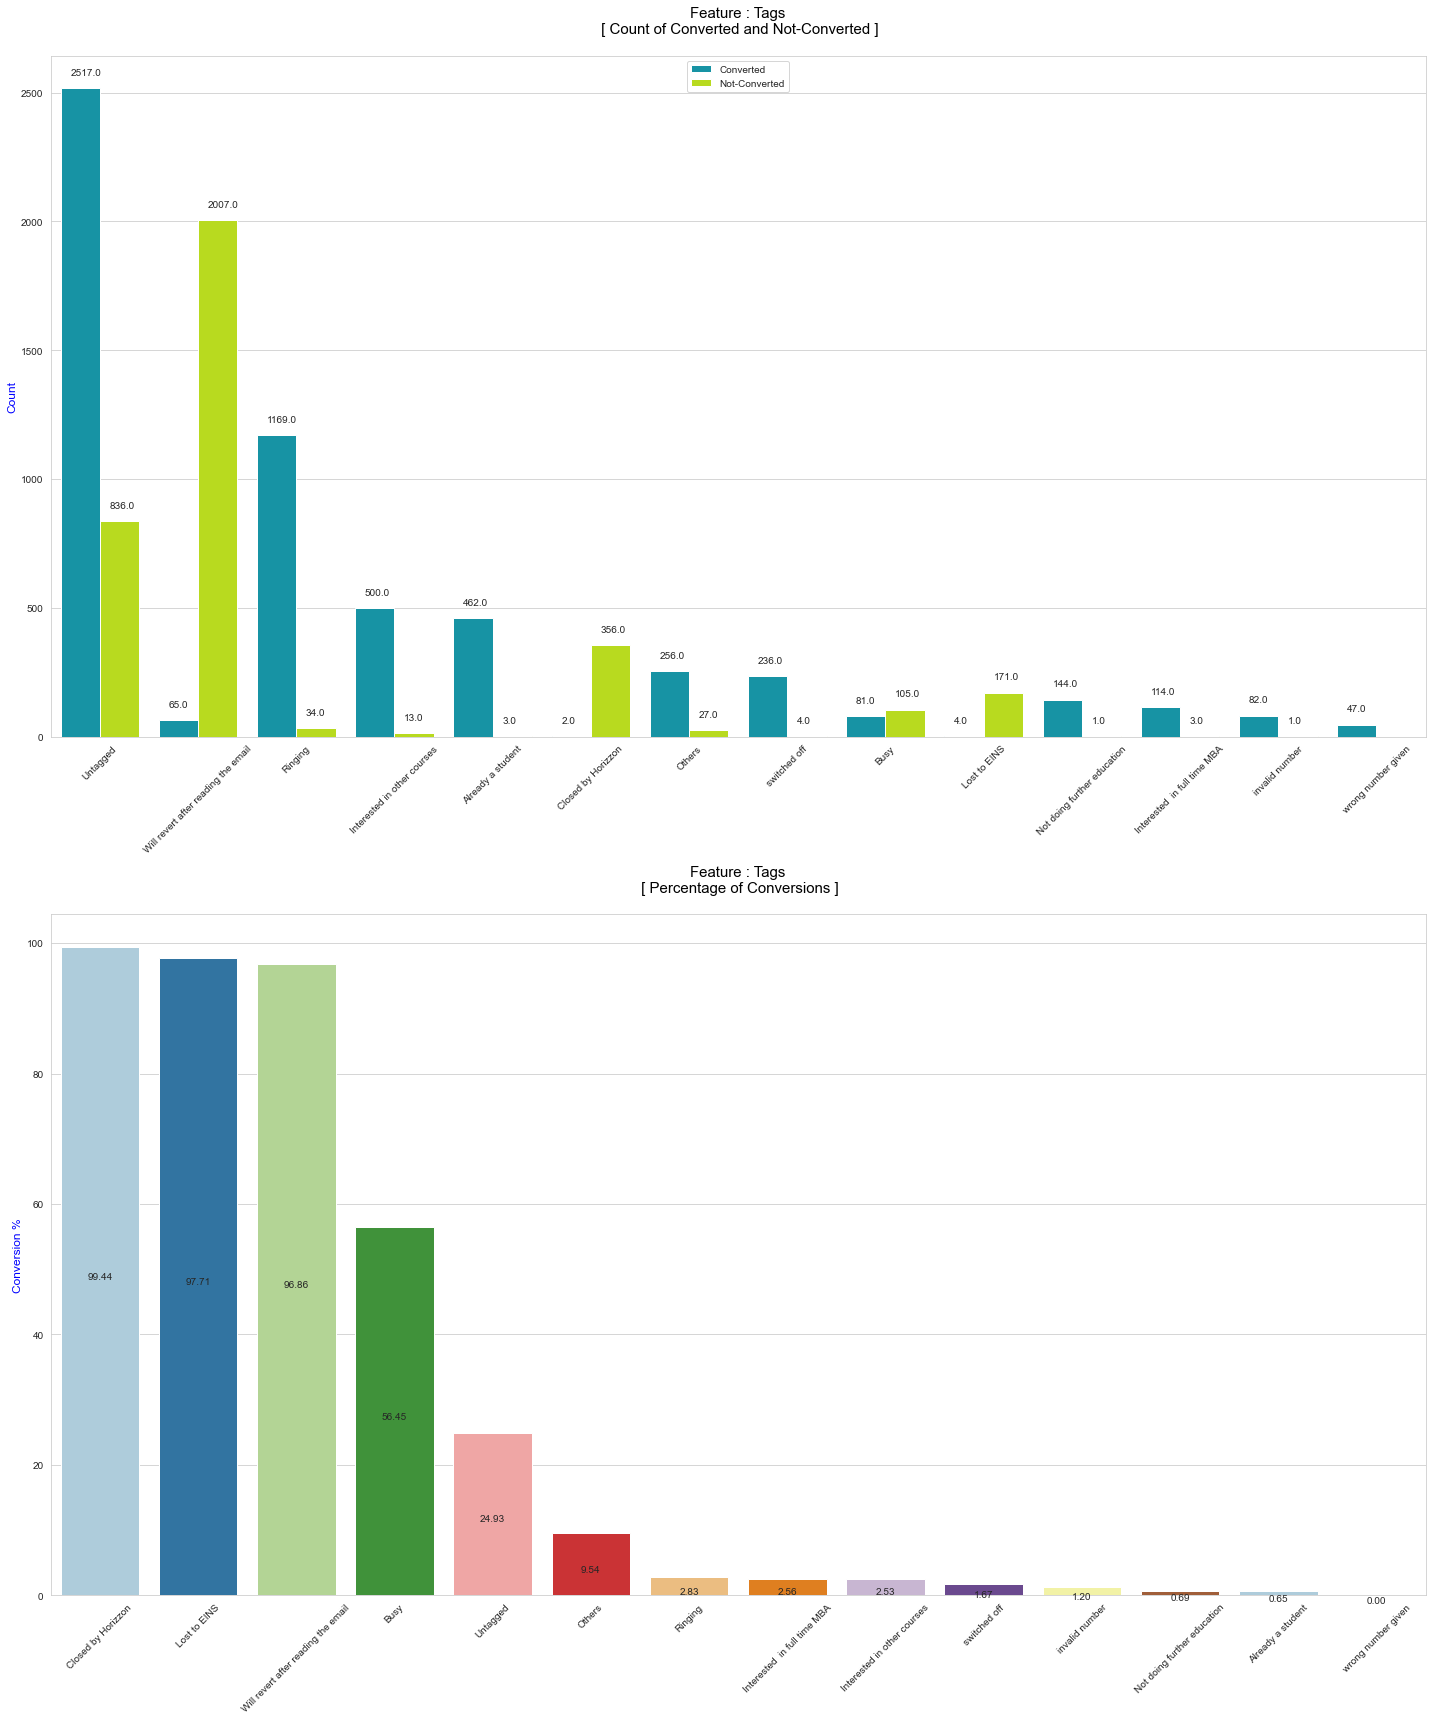

*****************************************************************************************************************************


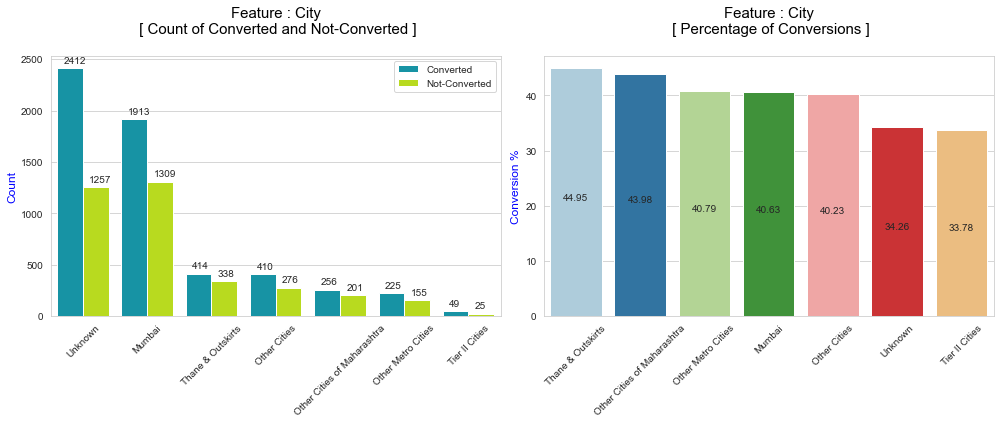

*****************************************************************************************************************************


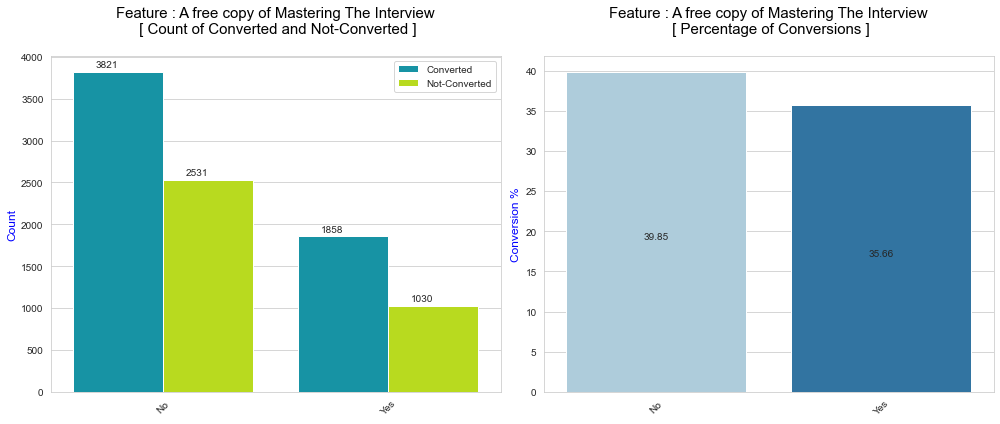

*****************************************************************************************************************************


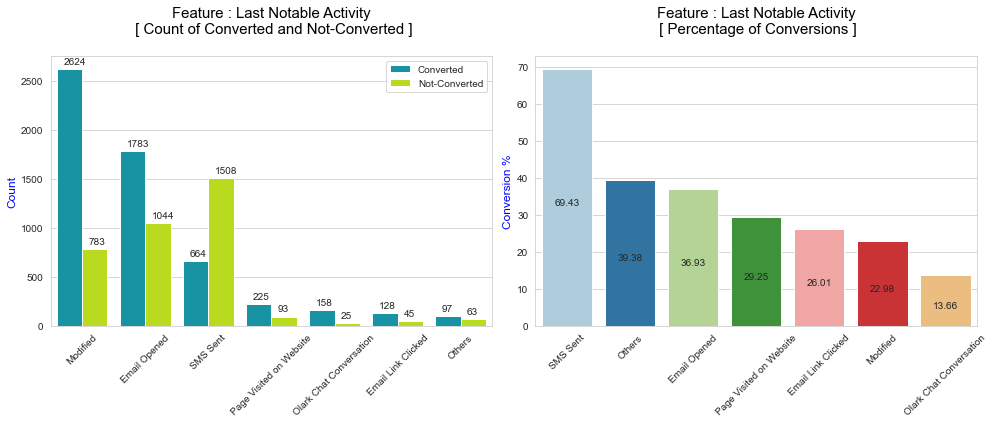

*****************************************************************************************************************************


In [56]:
for col in cat_vars:
    if col in ["Specialization","Tags"]:
        univariate_categorical(leads,col,False)
    else:
        univariate_categorical(leads,col,True)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Insights:
    
- `Lead Origin`: 
    1. Quick Add Form and Lead Add Form have 100% and ~92% conversion rate but number of leads are very less.
    
    2. Landing Page Submission and API have considerable number of leads and have a conversion rate of 30-35%.
   
    3. Lead import has around 29% conversion rate but number of leads are very less.
    


- `Lead Source`:
    1. Google and Direct Traffic generates maximum number of leads.
    
    2. Conversion Rate of leads through Reference and Welingak Website is high.
    

    
- `Do Not Email`:
    1. Visitors who choose to get an email are more likely to be converted and have higher number of leads.
    
    
- `Last Activity`:  
    1. Most of the leads have Email opened as their last activity.

    2. Conversion rate for leads with last activity as SMS Sent is around 63%.

    
- `Specialization`:
    1. Finance Management, Human Resource Management and Marketing Management generate higher number of leads.
    
    2. Conversion rate is highest for Healthcare Management followed by Banking, Investment and Insurance.
    
    
    
- `What is your current occupation`:
    1. Working Professionals have a strong conversion rate of around 92%.

    2. Unemployed leads are the most in numbers but have around 43% conversion rate.
    
    

- `Tags`:
    
    1. Closed by Horizons or Lost to Competitors have the highest conversion rate, but have limited leads.

    
- `City`:
    1. Most leads are from Mumbai with around 41% conversion rate
    
    
    
- `A free copy of Mastering The Interview`:
    
    1. Nothing substantial can be inferred. 
    
    
    
- `Last Notable Activity`:
    
    1. Insights are similar to the `Last Activity`

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

### c. Univariate Analysis of Numeric Features

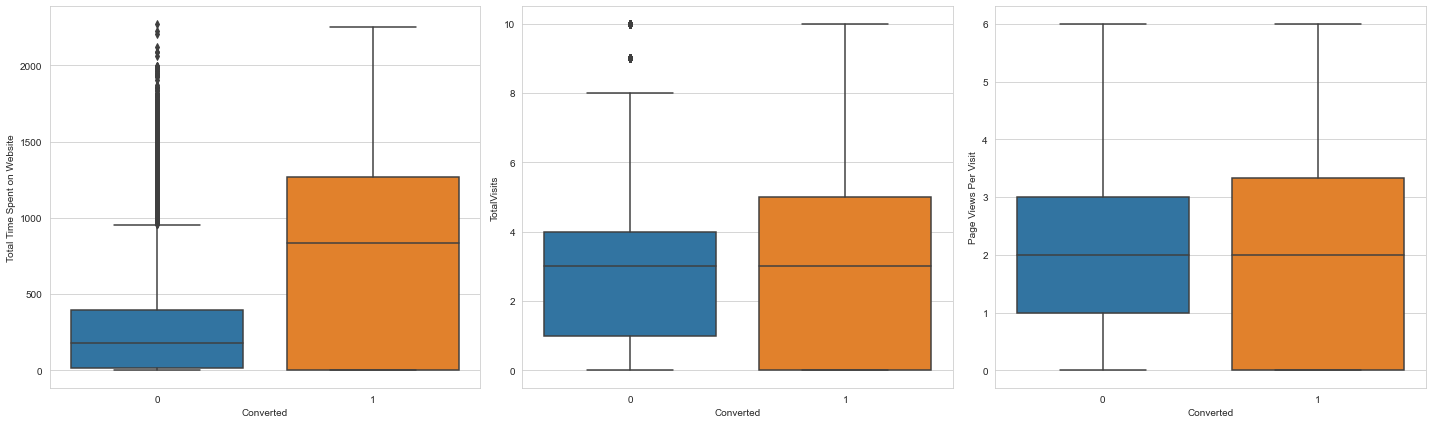

In [57]:
# Plotting boxplot for anaylsis of numeric features

plt.figure(figsize=(20,6))

for i in enumerate(num_vars):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(y = leads[i[1]], x = 'Converted', data = leads)
    plt.tight_layout()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Insights:
    
- `Total Time Spent on Website`:
    
    1. Leads spending more time on the website are more likely to be converted.
    
   
- `TotalVisits`:
    
    1. Median for converted and unconverted leads is same hence nothing substantial can be inferred.
    
    
- `Page Views Per Visit`:

    1. Median for converted and unconverted leads is same hence nothing substantial can be inferred.
    
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

### d. Correlation Analysis of Numeric Features

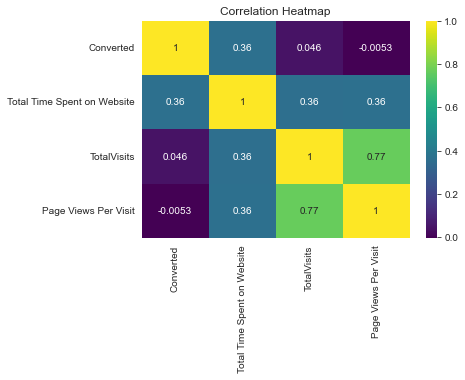

In [58]:
#Plotting heatmap to check correlation among the numeric features

plt.figure(figsize=(6,4))
sns.heatmap(leads[num_cols].corr(), cmap="viridis", annot=True)
plt.title("Correlation Heatmap",fontsize=12)
plt.show()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Insights:
    
- `Total Visits` and `Page Views Per Visit` have strong correlation.
- `Total Visits` and `Total Time Spent on Website` have low correlation.
    
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 7. Preparing the Data for Modelling

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### a. Mapping binary values to 0 and 1

In [59]:
# Converting binary variables to 0 and 1

leads["Do Not Email"]=leads["Do Not Email"].map({'Yes': 1, "No": 0})
leads["A free copy of Mastering The Interview"]=leads["A free copy of Mastering The Interview"].map({'Yes': 1, "No": 0})

### b. Encoding

In [60]:
# Creating dummy variables for the selected features

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)

# Concatenating dummy variable to main dataframe
leads = pd.concat([leads, dummy], axis=1)


leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','City',
            'Last Notable Activity'],axis=1,inplace=True)

leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Untagged,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [61]:
# Checking information of the prepared dataset

leads.shape

(9240, 77)

In [62]:
# Checking the information of prepared data

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 77 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

### c. Test-Train Splitting

In [63]:
# Splitting the data into train and test

np.random.seed(0)
df_train,df_test=train_test_split(leads,train_size=0.7,random_state=100)
print(f'df_train shape: {df_train.shape}')
print(f'df_test shape: {df_test.shape}')

df_train shape: (6468, 77)
df_test shape: (2772, 77)


### c. Rescaling

In [64]:
# Instantiating an object

scaler=StandardScaler()

# Fitting and transforming the train-set

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# Displaying statistical summary of train-set after rescaling

df_train[num_vars].describe()

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,-1.609377e-16,-6.206813e-17,-9.142003e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-8.853708e-01,-1.149699e+00,-1.266675e+00
25%,-8.634138e-01,-7.873438e-01,-7.025878e-01
50%,-4.352528e-01,-6.263344e-02,-1.385005e-01
75%,8.098906e-01,6.620769e-01,4.255868e-01
max,3.271816e+00,2.473853e+00,2.117849e+00


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Mapped binary values of the features `Do Not Email` and `A free copy of Mastering The Interview` to 0 and 1
- Created dummy variables for categorical features
- Performed the test-train split
- Fitted and transformed the numerical features with Standard Scaler
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 8. Training the Model

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### a. Checking correlation coefficients

In [65]:
# Enlisting Top-15 correlation

corr = df_train.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'], 2)
corr_df.sort_values(by = 'Correlation', ascending = False).head(15)

,VAR1,VAR2,Correlation
778,Lead Source_Facebook,Lead Origin_Lead Import,0.97
1162,Lead Source_Reference,Lead Origin_Lead Add Form,0.86
5430,City_Unknown,Specialization_Others,0.85
5877,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.85
5487,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.84
4670,Tags_Untagged,What is your current occupation_Unspecified,0.81
310,Page Views Per Visit,TotalVisits,0.76
5799,Last Notable Activity_Page Visited on Website,Last Activity_Page Visited on Website,0.69
4698,Tags_Will revert after reading the email,Converted,0.65
1386,Last Activity_Email Bounced,Do Not Email,0.63


### b. Splitting into X_train and y_train

In [66]:
# Creating X_train and y_train

y_train=df_train.pop("Converted")
X_train=df_train

### c. Selecting features using RFE

In [67]:
# Running RFE with the output number of the variable equal to 15

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# running RFE
rfe = RFE(logreg, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [68]:
# Investigating feature ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 2),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 32),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', False, 3),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 40),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 55),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', False, 53),
 ('Lead Source_Referral Sites', False, 56),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 8),
 ('Last Activity_Email Link Clicked', False, 43),
 ('Last Activity_Email Opened', False, 17),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', False, 24),
 ('Last Activity_Others', False, 19),
 ('Last Activity

In [69]:
# Checking top ranked features

col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Unspecified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing', 'Tags_Untagged',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [70]:
# Checking insignificant features

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healt

In [71]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Checked correlation coefficients to find Top-15 correlation pairs among independent variables.
- The data is fit for building logistic regression model, hence proceeded with splitting and recursive function elimination(RFE) for feature ranking for selecting the features.
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 9. Modelling the Data

<p style="padding: 0.015px;
              color:white;">
</p>
</div>


In [72]:
# Defining VIF function

def vif(train_set):
    vif = pd.DataFrame()
    vif['Features'] = train_set.columns
    vif['VIF'] = [variance_inflation_factor(train_set.values, i) for i in range(train_set.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [73]:
# Defining modelling function

def logistic_modelling(train_set,lm_name,logit_name,glm_name):
    # Adding a constant
    globals()[lm_name]=sm.add_constant(train_set)
    
    # Creating a fitted model
    globals()[logit_name]=sm.GLM(y_train, globals()[lm_name],family = sm.families.Binomial())
    globals()[glm_name]=globals()[logit_name].fit()
    
    # Printing OLS Regression Results
    print((globals()[glm_name]).summary())

## Model 1

In [74]:
# VIF check

vif(X_train_rfe)

,Features,VIF
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04
11,Tags_switched off,1.04
14,Last Notable Activity_Olark Chat Conversation,1.04
6,Tags_Not doing further education,1.03
10,Tags_invalid number,1.01
12,Tags_wrong number given,1.01
2,What is your current occupation_Unspecified,0.25


In [75]:
# Adding constant, creating a fitted model and printing the GLM Regression Results

logistic_modelling(X_train_rfe,"X_train_lm1","logit1","glm1")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1285.6
Date:                Tue, 03 Jan 2023   Deviance:                       2571.2
Time:                        01:24:32   Pearson chi2:                 1.61e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6062
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Model 2

In [76]:
# Removing the variable 'Tags_wrong number given' based on its high p-value

X_train_rfe = X_train_rfe.drop(["Tags_wrong number given"], axis = 1)

In [77]:
# VIF check

vif(X_train_rfe)

,Features,VIF
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04
11,Tags_switched off,1.04
13,Last Notable Activity_Olark Chat Conversation,1.04
6,Tags_Not doing further education,1.03
10,Tags_invalid number,1.01
2,What is your current occupation_Unspecified,0.25
9,Tags_Will revert after reading the email,0.15


In [78]:
# Adding constant, creating a fitted model and printing the GLM Regression Results

logistic_modelling(X_train_rfe,"X_train_lm2","logit2","glm2")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1290.2
Date:                Tue, 03 Jan 2023   Deviance:                       2580.3
Time:                        01:24:32   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6056
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Model 3

In [79]:
# Removing the variable 'Tags_Not doing further education' based on its high p-value

X_train_rfe = X_train_rfe.drop(["Tags_Not doing further education"], axis = 1)

In [80]:
# VIF check

vif(X_train_rfe)

,Features,VIF
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04
10,Tags_switched off,1.04
12,Last Notable Activity_Olark Chat Conversation,1.04
9,Tags_invalid number,1.01
2,What is your current occupation_Unspecified,0.25
8,Tags_Will revert after reading the email,0.15
1,Last Activity_SMS Sent,0.13


In [81]:
# Adding constant, creating a fitted model and printing the GLM Regression Results

logistic_modelling(X_train_rfe,"X_train_lm3","logit3","glm3")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1291.2
Date:                Tue, 03 Jan 2023   Deviance:                       2582.4
Time:                        01:24:33   Pearson chi2:                 1.58e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6055
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Model 4

In [82]:
# Removing the variable 'Tags_invalid number' based on its high p-value

X_train_rfe = X_train_rfe.drop(["Tags_invalid number"], axis = 1)

In [83]:
# VIF check

vif(X_train_rfe)

,Features,VIF
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04
9,Tags_switched off,1.04
11,Last Notable Activity_Olark Chat Conversation,1.04
2,What is your current occupation_Unspecified,0.25
8,Tags_Will revert after reading the email,0.15
1,Last Activity_SMS Sent,0.13
6,Tags_Ringing,0.10


In [84]:
# Adding constant, creating a fitted model and printing the GLM Regression Results

logistic_modelling(X_train_rfe,"X_train_lm4","logit4","glm4")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1295.5
Date:                Tue, 03 Jan 2023   Deviance:                       2590.9
Time:                        01:24:33   Pearson chi2:                 1.54e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6050
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## Model 5

In [85]:
# Removing the variable 'Last Notable Activity_Olark Chat Conversation' based on its high p-value

X_train_rfe = X_train_rfe.drop(["Last Notable Activity_Olark Chat Conversation"], axis = 1)

In [86]:
# VIF check

vif(X_train_rfe)

,Features,VIF
0,Lead Source_Welingak Website,1.12
4,Tags_Closed by Horizzon,1.07
5,Tags_Lost to EINS,1.06
3,Tags_Busy,1.04
9,Tags_switched off,1.04
2,What is your current occupation_Unspecified,0.25
8,Tags_Will revert after reading the email,0.14
1,Last Activity_SMS Sent,0.13
6,Tags_Ringing,0.10
7,Tags_Untagged,0.09


In [87]:
# Adding constant, creating a fitted model and printing the GLM Regression Results

logistic_modelling(X_train_rfe,"X_train_lm5","logit5","glm5")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1300.0
Date:                Tue, 03 Jan 2023   Deviance:                       2600.0
Time:                        01:24:33   Pearson chi2:                 1.55e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6044
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [88]:
# Checking the parameters and their coefficient values of final model (glm5)

glm5.params

const                                         -3.284628
Lead Source_Welingak Website                   2.815890
Last Activity_SMS Sent                         2.229848
What is your current occupation_Unspecified   -2.545756
Tags_Busy                                      2.292987
Tags_Closed by Horizzon                        9.743327
Tags_Lost to EINS                              9.706759
Tags_Ringing                                  -1.468581
Tags_Untagged                                  3.691144
Tags_Will revert after reading the email       6.590905
Tags_switched off                             -1.938484
Last Notable Activity_Modified                -1.486368
dtype: float64

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Manually eliminated independent variables on the basis of high p-value and high VIF
- Considered Model 5(glm5) as the final model, since it has all important statistics high , along with no insignificant variables and no multi collinear (high VIF) variables. 
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 10. Prediction and Model Evaluation (Train Set)

<p style="padding: 0.015px;
              color:white;">
</p>
</div>


### a. Prediction

In [89]:
# Making predicitions on the train set

y_train_pred = glm5.predict(X_train_lm5)

# Printing 10 predicted values of the train set

y_train_pred[:10]

1871    0.008550
6795    0.600252
3516    0.008550
8105    0.074237
3934    0.253534
4844    0.996074
3297    0.008550
8071    0.993121
987     0.025942
7423    0.996074
dtype: float64

In [90]:
# Reshaping the predicted values to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00855024, 0.60025212, 0.00855024, 0.07423664, 0.25353402,
       0.99607371, 0.00855024, 0.99312067, 0.025942  , 0.99607371])

In [91]:
# Creating a dataframe with the actual conversion rate and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Actual':y_train.values, 'Probability':y_train_pred})
y_train_pred_final.head()

,Actual,Probability
0,0,0.008550
1,0,0.600252
2,0,0.008550
3,0,0.074237
4,0,0.253534


In [92]:
# Creating a new feature 'Predicted' having values as 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual,Probability,Predicted
0,0,0.008550,0
1,0,0.600252,1
2,0,0.008550,0
3,0,0.074237,0
4,0,0.253534,0


### b. Evaluation

In [93]:
# Defining function for confusion_matrix

def conf_matrix(cf_matrix):
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(5,4))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlOrBr',annot_kws={'size': 14})
    plt.title('Confusion Matrix', size=14,  weight='bold')
    plt.tight_layout()
    
    return plt.show()

In [94]:
# Defining function for various evaluation metrics

def evaluation_metrics(pred_df,predicted_feature):
    
    confusion   = confusion_matrix(pred_df["Actual"],pred_df[predicted_feature])

    TP          = confusion[1,1] # true positive 
    TN          = confusion[0,0] # true negatives
    FP          = confusion[0,1] # false positives
    FN          = confusion[1,0] # false negatives

    Accuracy    = np.round( accuracy_score(pred_df["Actual"],pred_df["Predicted"])*100, 3)
    Senstivity  = np.round( TP/( FN + TP)*100, 3)
    Specificity = np.round( TN/( FP + TN)*100, 3)
    FPR         = np.round( FP/( FP + TN)*100, 3)
    FNR         = np.round( FN/( FN + TP)*100, 3)
    Recall      = recall_score(pred_df["Actual"],pred_df["Predicted"])*100
    Precision   = np.round( TP/(TP + FP)*100, 3)
    AUC         = roc_auc_score( pred_df["Actual"], pred_df["Probability"] )*100
    
    eval_df = pd.DataFrame({"Accuracy": Accuracy, "Senstivity": Senstivity, "Specificity" : Specificity, "FPR": FPR, 
                            "FNR": FNR, "Recall": Recall, "Precision": Precision,"AUC": AUC}, index=[0])
    eval_df = eval_df.T
    eval_df.columns = ["Score"]    
    return eval_df  

In [95]:
# Defining function to draw ROC

def draw_roc( actual, probability):
    
    TPR, FPR, THRESHOLDS = roc_curve(actual, probability, drop_intermediate = False)
    AUC                  = roc_auc_score( actual, probability )
    
    plt.figure(figsize = (8,6))
    plt.plot(TPR,FPR, label = "ROC CURVE (AUC = %0.2f" %AUC)
    plt.plot([0,1], [0,1],  "k--")
    plt.xlabel('False Positive Rate', fontsize = 14, weight = "bold")
    plt.ylabel('True Positive Rate', fontsize = 14, weight = "bold")
    plt.title('Receiver Operating Characteristic Curve', fontsize = 16, weight = "bold")
    plt.legend( loc="lower right")
    plt.rcParams.update({'legend.fontsize': 14})
    plt.grid(linestyle='--', linewidth=.5)
    plt.yticks(fontsize = 10, weight = "bold") 
    plt.xticks(fontsize = 10, weight = "bold")
    plt.show()

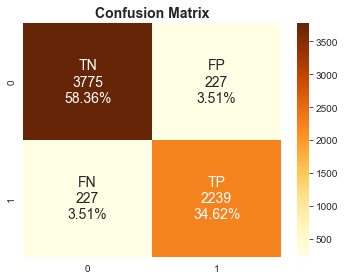

In [96]:
# Plotting confusion matrix

conf_matrix(confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted))

In [97]:
# Printing the various evaluation metrics

evaluation_metrics(y_train_pred_final,"Predicted")

,Score
Accuracy,92.981000
Senstivity,90.795000
Specificity,94.328000
FPR,5.672000
FNR,9.205000
Recall,90.794809
Precision,90.795000
AUC,96.805288


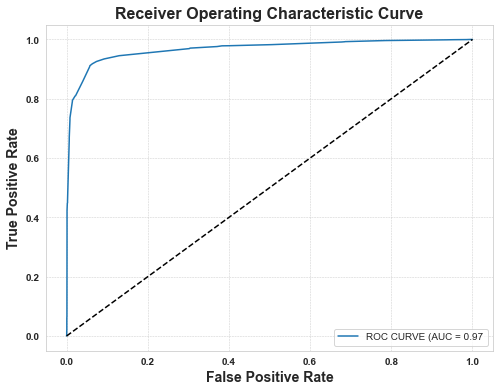

In [98]:
# Plotting the ROC 

draw_roc(y_train_pred_final.Actual, y_train_pred_final.Probability)

### c. Finding Optimal Cut-off Point & Re-Evaluating various Metrics

In [99]:
# Creating columns with different probability cutoffs

nums = [ float(x)/20 for x in range(20)]
for i in nums:
        y_train_pred_final[i] = y_train_pred_final["Probability"].apply(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual,Probability,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.008550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.600252,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
2,0,0.008550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.074237,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.253534,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy','Senstivity','Specificity']) 
for i in nums:
        confusion   = confusion_matrix(y_train_pred_final["Actual"],y_train_pred_final[i])
        accuracy    = accuracy_score(y_train_pred_final["Actual"],y_train_pred_final[i])
        senstivity  = confusion[1,1]/( confusion[1,0] + confusion[1,1])
        specificity = confusion[0,0]/( confusion[0,1] + confusion[0,0])
        cutoff_df.loc[i] = [ i ,accuracy,senstivity,specificity]
cutoff_df

,Probability,Accuracy,Senstivity,Specificity
0.00,0.00,0.381262,1.000000,0.000000
0.05,0.05,0.754947,0.978508,0.617191
0.10,0.10,0.801175,0.969181,0.697651
0.15,0.15,0.899041,0.945255,0.870565
0.20,0.20,0.917749,0.934307,0.907546
0.25,0.25,0.917749,0.934307,0.907546
0.30,0.30,0.930736,0.911598,0.942529
0.35,0.35,0.930736,0.911598,0.942529
0.40,0.40,0.930736,0.911598,0.942529
0.45,0.45,0.929808,0.907948,0.943278


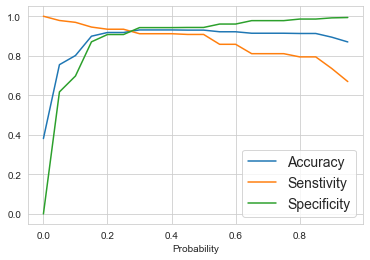

In [101]:
# Plotting Accuracy, Sensitivity and Specificity for various probabilities.

cutoff_df.plot.line(x='Probability', y=['Accuracy','Senstivity','Specificity'])
plt.show()

In [102]:
# From the curve above, cut-off probability 0.3 seems to be optimal

y_train_pred_final['Final Prediction'] = y_train_pred_final.Probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Actual,Probability,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,Final Prediction
0,0,0.008550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.600252,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1
2,0,0.008550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.074237,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.253534,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
# Assigning Lead Score

y_train_pred_final['Lead Score'] = y_train_pred_final.Probability.map( lambda x: round(x*100))
y_train_pred_final.head()

,Actual,Probability,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,Final Prediction,Lead Score
0,0,0.008550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0.600252,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,60
2,0,0.008550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.074237,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
4,0,0.253534,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25


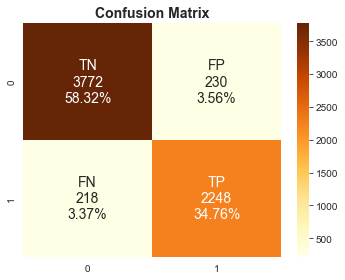

In [104]:
# Plotting confusion matrix

conf_matrix(confusion_matrix(y_train_pred_final["Actual"], y_train_pred_final["Final Prediction"]))

In [105]:
# Checking various evaluation metrics

evaluation_metrics(y_train_pred_final,"Final Prediction")

,Score
Accuracy,92.981000
Senstivity,91.160000
Specificity,94.253000
FPR,5.747000
FNR,8.840000
Recall,90.794809
Precision,90.718000
AUC,96.805288


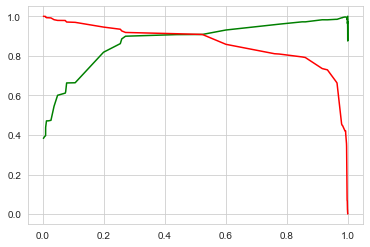

In [106]:
# Plotting the Precision Recall Curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual, y_train_pred_final.Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Made predictions using Model 5(glm5) by setting cut-off as 0.5 and evaluated the model using various evaluation metrics
- Found the optimal cut-off as 0.3 using various probabilities and found the final predicted values.
- Revaluated metrics for final predicted values and assigned lead score.
- Since the scores of evaluation metrics were as desired, decided to go ahead with the prediction on the test set.

    <p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 11. Prediction and Model Evaluation (Test Set)

<p style="padding: 0.015px;
              color:white;">
</p>
</div>


### a). Applying Scaling on Test Set

In [107]:
# Transforming numeric features using Standard Scaler

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unspecified,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Untagged,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.081890,0.395022,0.007694,0.023314,0.018003,0.314214,0.530303,0.073593,0.007937,0.0,0.007937,0.300866,0.189394,0.133838,0.001804,0.051948,0.011905,0.018398,0.032828,0.030303,0.387446,0.012266,0.112554,0.004690,0.062771,0.289322,0.012987,0.007937,0.043651,0.007215,0.010101,0.106061,0.020924,0.009740,0.091991,0.045094,0.020563,0.084416,0.025253,0.047980,0.361833,0.010823,0.00938,0.003247,0.038240,0.023449,0.000361,0.002886,0.026696,0.608225,0.287518,0.073593,0.022006,0.040043,0.012987,0.052309,0.022727,0.012987,0.031025,0.128427,0.363276,0.230159,0.007576,0.021284,0.005772,0.069264,0.049062,0.041847,0.086219,0.008297,0.390332,0.307359,0.370851,0.022727,0.019120,0.031025,0.229437
std,0.274247,0.488944,1.001786,1.008922,1.012426,0.464286,0.499171,0.261155,0.088749,0.0,0.088749,0.458717,0.391892,0.340540,0.04

### b). Splitting into X_test and y_test

In [108]:
# X_test and y-test split

y_test = df_test.pop('Converted')
X_test = df_test

### c). Making Predictions

In [109]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_test_pred = glm5.predict(X_test_new)

# Printing 10 predicted values of the train set

y_test_pred[:10]

4269    0.522636
2376    0.996074
7766    0.964644
9199    0.008401
4359    0.964644
9186    0.996074
1631    0.964644
8963    0.964644
8007    0.025942
5324    0.996074
dtype: float64

In [110]:
# Reshaping the predicted values to an array

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.52263646, 0.99607371, 0.96464354, 0.00840077, 0.96464354,
       0.99607371, 0.96464354, 0.96464354, 0.025942  , 0.99607371])

In [111]:
# Creating a dataframe with the actual conversion rate and the predicted probabilities

y_test_pred_final = pd.DataFrame({'Actual':y_test.values, 'Probability':y_test_pred})
y_test_pred_final.head()

,Actual,Probability
0,1,0.522636
1,1,0.996074
2,1,0.964644
3,0,0.008401
4,1,0.964644


In [112]:
# Creating a new feature 'Predicted' having values as 1 if Converted_Prob > 0.3(optimal cut-off) else 0

y_test_pred_final['Predicted'] = y_test_pred_final.Probability.map(lambda x: 1 if x > 0.3 else 0)
y_test_pred_final.head()

,Actual,Probability,Predicted
0,1,0.522636,1
1,1,0.996074,1
2,1,0.964644,1
3,0,0.008401,0
4,1,0.964644,1


In [113]:
# Assigning Lead Score

y_test_pred_final['Lead Score'] = y_train_pred_final.Probability.map( lambda x: round(x*100))
y_test_pred_final.head()

,Actual,Probability,Predicted,Lead Score
0,1,0.522636,1,1
1,1,0.996074,1,60
2,1,0.964644,1,1
3,0,0.008401,0,7
4,1,0.964644,1,25


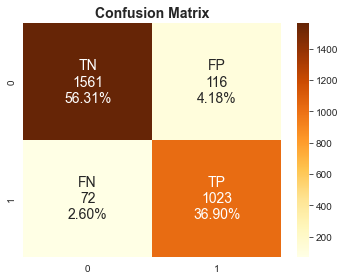

In [114]:
# Plotting confusion matrix

conf_matrix(confusion_matrix(y_test_pred_final["Actual"], y_test_pred_final["Predicted"]))

In [115]:
# Checking various evaluation metrics

evaluation_metrics(y_test_pred_final,"Predicted")

,Score
Accuracy,93.218000
Senstivity,93.425000
Specificity,93.083000
FPR,6.917000
FNR,6.575000
Recall,93.424658
Precision,89.816000
AUC,97.316473


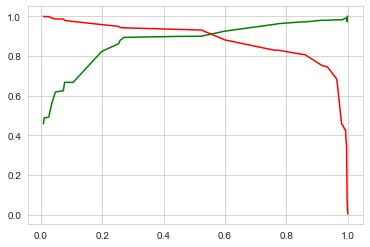

In [116]:
# Plotting the Precision Recall Curve

p, r, thresholds = precision_recall_curve(y_test_pred_final.Actual, y_test_pred_final.Probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Transformed the numeric features of the test data with Standard Scaler.
- Splitted the test data into X_test and y_test and dropped features in X_test to aling with X_train.
- Made predications on the test set using the final model (glm5).
- Set cut-off as 0.3(optimal cut-off found earlier) and evaluated the model using various evaluation metrics.
- The scores of evaluation metrics were found to as desired.

    <p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 12. Comparison of Evaluation Metrics of Train and Test Sets

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [117]:
# Comparing the evaluation metrics of Train and Test sets

train_metrics = evaluation_metrics(y_train_pred_final,"Final Prediction")
test_metrics  = evaluation_metrics(y_test_pred_final,"Predicted")
metric_comparison = pd.concat([train_metrics,test_metrics],axis=1)
metric_comparison.columns=["Train Score","Test Score"]
metric_comparison

,Train Score,Test Score
Accuracy,92.981000,93.218000
Senstivity,91.160000,93.425000
Specificity,94.253000,93.083000
FPR,5.747000,6.917000
FNR,8.840000,6.575000
Recall,90.794809,93.424658
Precision,90.718000,89.816000
AUC,96.805288,97.316473


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- The scores of evaluation metrics is similar for both Train and Test sets.

    <p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 13. Recommendations

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### To improve overall lead conversion rate, focus should be on:



    a.  Improving lead conversion of Landing Page Submission and API and generating more leads from Lead Add Form.

    b.  Improving lead conversion of Olark Chat, Organic Search, Direct Traffic and Google and generating more leads from 
        Reference and Welingak Website.

    c.  Generating more leads from Healthcare Management followed by Banking, Investment and Insurance.

    d.  Generating more leads from Working Professionals.

    e.  Generating more leads from Thane & Outskirts, Other Cities of Maharastra and Other Metro Cities as they have a good 
        conversion rate.
    
    f.  Generating more leads from Closed by Horizzon or Lost to Competitors since they have good conversion rate.





### Additional Reccomendations:</b> 

    1.  The organization must do way with giving a free copy of "Mastering The Interview" to save cost as it has minimal 
        effect on lead conversion.
        
    2.  Leads spending more time on the website are more likely to be converted, hence the organization must work on 
        building a more engaging website.